![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


# Carga y preprocesamiento de datos
Al cargar los datos, no se encontraron nulos para ninguna de las características, todas están en formato numérico, por lo que no se requiere de mucho preprocesamiento.

In [1]:
import pandas as pd # feature selection

In [2]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
df.dtypes #

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

# Variables a utilizar y variable objetivo

A simple vista, parece que todas las variables pueden tener relevancia en el modelo de clasificación, la variable objetivo será fetal_health el cual contiene una categoría.

Se implementarán los modelos de clasificación y se verificarán cuales de las características son las más relevantes.

a. Las categorías ya estan definidas en fetal_health: 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological)

# Split de data de entrenamiento y data de test

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Confirm the sizes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1700, 21), (426, 21), (1700,), (426,))

# Entrenamiento y evaluación de modelos

Se realizó una función para realizar la prueba de validación cruzada con los modelos y mostrar el classification report

In [6]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model(model, X, y, name):
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X, y, cv=5)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(f"Cross validation: Accuracy of {name} (mean ± std): {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Random forest

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       343
         2.0       0.85      0.80      0.82        50
         3.0       0.94      0.91      0.92        33

    accuracy                           0.96       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.95      0.96      0.95       426

Cross validation: Accuracy of Random forest (mean ± std): 0.9412 ± 0.0113


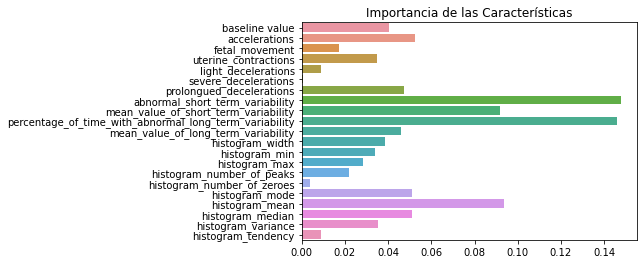

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Entrenar un clasificador de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf.predict(X_test)
evaluate_model(rf, X_train, y_train, "Random forest")

# Importancia de las características
feature_importances = rf.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Importancia de las Características')
plt.show()


Si bien algunas de las características no son tan relevantes para el modelo (severe_decelerations, histogram_number_of_zeroes,histogram_tendency, light_decelerations). La mayoría de variables utilizadas son útiles para la predicción

# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=3)


# Evaluate models
evaluate_model(knn, X_train, y_train, "K-Nearest Neighbors")



              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       343
         2.0       0.62      0.70      0.66        50
         3.0       0.86      0.73      0.79        33

    accuracy                           0.90       426
   macro avg       0.81      0.79      0.80       426
weighted avg       0.90      0.90      0.90       426

Cross validation: Accuracy of K-Nearest Neighbors (mean ± std): 0.8988 ± 0.0066


# Árbol de decisión

In [9]:
decision_tree = DecisionTreeClassifier()
evaluate_model(decision_tree, X_train, y_train, "Decision Tree")

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       343
         2.0       0.69      0.74      0.71        50
         3.0       0.91      0.91      0.91        33

    accuracy                           0.92       426
   macro avg       0.85      0.86      0.86       426
weighted avg       0.92      0.92      0.92       426

Cross validation: Accuracy of Decision Tree (mean ± std): 0.9200 ± 0.0120


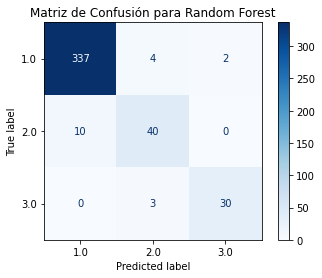

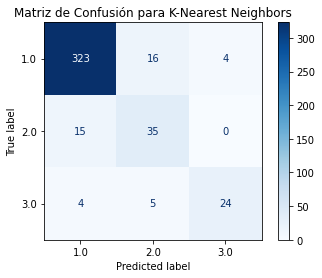

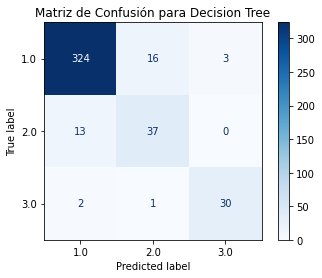

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión para {model_name}')

plot_confusion_matrix(rf, X_test, y_test, "Random Forest")
plot_confusion_matrix(knn, X_test, y_test, "K-Nearest Neighbors")
plot_confusion_matrix(decision_tree, X_test, y_test, "Decision Tree")


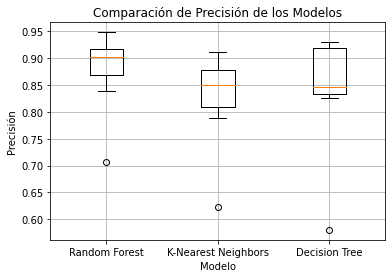

In [11]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Función para plotear comparaciones de modelos usando validación cruzada
def plot_model_comparison(models, X, y, names):
    results = []
    for model in models:
        cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
        results.append(cv_results)

    # Crear un diagrama de caja
    fig, ax = plt.subplots()
    ax.boxplot(results, labels=names)
    ax.set_title('Comparación de Precisión de los Modelos')
    ax.set_ylabel('Precisión')
    ax.set_xlabel('Modelo')
    plt.grid(True)
    plt.show()

# Inicializar los modelos
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(random_state=42)

# Preparar los nombres de los modelos
models = [rf, knn, decision_tree]
names = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree']

# Asumiendo que 'X' y 'y' son tus variables de características y objetivo
plot_model_comparison(models, X, y, names)


# Mejor modelo: Random forest
Obtuvo las mejores métricas entre los 3 modelos de clasificación.

## Curva ROC del random forest:

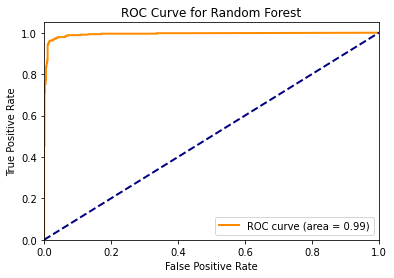

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def plot_roc_curve(model, X_test, y_test, model_name):
    # Binarize the output labels if more than two classes
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    y_score = model.predict_proba(X_test)
    
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Asegurarse de ajustar el modelo
ovr_rf = OneVsRestClassifier(rf)
ovr_rf.fit(X_train, y_train)
plot_roc_curve(ovr_rf, X_test, y_test, "Random Forest")
